<a href="https://colab.research.google.com/github/iam-fern/Generate_addition/blob/main/GQtest_cluster_data_add_delta_(_0_8)_n60_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/addition_pattern/addition_delta_-0.8'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_-0.8_n60.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,99.603264,43.012330,80.803224,0.015918,233.434736,233.429027,0.005709
1,0.0,1.0,36.804833,30.490365,41.718286,-0.030461,118.983024,118.998022,-0.014998
2,0.0,2.0,68.936198,40.178470,74.862601,-0.023180,193.954090,193.977622,-0.023532
3,0.0,3.0,21.169791,56.283036,44.501757,-0.031564,131.923020,131.936483,-0.013463
4,0.0,4.0,66.729593,59.050453,33.399193,0.013744,169.192982,169.171881,0.021101
...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,66.921336,32.598956,57.869244,0.015931,167.405467,167.394789,0.010678
59996,999.0,56.0,25.813623,78.076738,29.272661,0.010562,143.173585,143.175401,-0.001816
59997,999.0,57.0,89.148432,65.093591,83.799039,-0.017548,248.023513,248.036802,-0.013288
59998,999.0,58.0,54.260042,26.502889,83.713229,-0.144279,174.331880,174.472658,-0.140777


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    99.603264  43.012330  80.803224  ...  233.434736  233.429027  0.005709
      1.0    36.804833  30.490365  41.718286  ...  118.983024  118.998022 -0.014998
      2.0    68.936198  40.178470  74.862601  ...  193.954090  193.977622 -0.023532
      3.0    21.169791  56.283036  44.501757  ...  131.923020  131.936483 -0.013463
      4.0    66.729593  59.050453  33.399193  ...  169.192982  169.171881  0.021101
...                ...        ...        ...  ...         ...         ...       ...
999.0 55.0   66.921336  32.598956  57.869244  ...  167.405467  167.394789  0.010678
      56.0   25.813623  78.076738  29.272661  ...  143.173585  143.175401 -0.001816
      57.0   89.148432  65.093591  83.799039  ...  248.023513  248.036802 -0.013288
      58.0   54.260042  26.502889  83.713229  ...  174.331880  174.472658 -0.140777
      59.0   81.967960  31.221075  70.237942  ...  193.460077  193.428411  0.031667

[60000 rows x 7 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    99.603264  43.012330  80.803224  ...  233.434736  233.429027  0.005709
      1.0    36.804833  30.490365  41.718286  ...  118.983024  118.998022 -0.014998
      2.0    68.936198  40.178470  74.862601  ...  193.954090  193.977622 -0.023532
      3.0    21.169791  56.283036  44.501757  ...  131.923020  131.936483 -0.013463
      4.0    66.729593  59.050453  33.399193  ...  169.192982  169.171881  0.021101
...                ...        ...        ...  ...         ...         ...       ...
999.0 55.0   66.921336  32.598956  57.869244  ...  167.405467  167.394789  0.010678
      56.0   25.813623  78.076738  29.272661  ...  143.173585  143.175401 -0.001816
      57.0   89.148432  65.093591  83.799039  ...  248.023513  248.036802 -0.013288
      58.0   54.260042  26.502889  83.713229  ...  174.331880  174.472658 -0.140777
      59.0   81.967960  31.221075  70.237942  ...  193.460077  193.428411  0.031667

[60000 rows x 7 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,99.603264,43.012330,80.803224,0.015918,233.434736,233.429027,0.005709
1,0.0,1.0,36.804833,30.490365,41.718286,-0.030461,118.983024,118.998022,-0.014998
2,0.0,2.0,68.936198,40.178470,74.862601,-0.023180,193.954090,193.977622,-0.023532
3,0.0,3.0,21.169791,56.283036,44.501757,-0.031564,131.923020,131.936483,-0.013463
4,0.0,4.0,66.729593,59.050453,33.399193,0.013744,169.192982,169.171881,0.021101
...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,66.921336,32.598956,57.869244,0.015931,167.405467,167.394789,0.010678
59996,999.0,56.0,25.813623,78.076738,29.272661,0.010562,143.173585,143.175401,-0.001816
59997,999.0,57.0,89.148432,65.093591,83.799039,-0.017548,248.023513,248.036802,-0.013288
59998,999.0,58.0,54.260042,26.502889,83.713229,-0.144279,174.331880,174.472658,-0.140777


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    99.603264  43.012330  80.803224  ...  233.434736  233.429027  0.005709
      1.0    36.804833  30.490365  41.718286  ...  118.983024  118.998022 -0.014998
      2.0    68.936198  40.178470  74.862601  ...  193.954090  193.977622 -0.023532
      3.0    21.169791  56.283036  44.501757  ...  131.923020  131.936483 -0.013463
      4.0    66.729593  59.050453  33.399193  ...  169.192982  169.171881  0.021101
...                ...        ...        ...  ...         ...         ...       ...
999.0 55.0   66.921336  32.598956  57.869244  ...  167.405467  167.394789  0.010678
      56.0   25.813623  78.076738  29.272661  ...  143.173585  143.175401 -0.001816
      57.0   89.148432  65.093591  83.799039  ...  248.023513  248.036802 -0.013288
      58.0   54.260042  26.502889  83.713229  ...  174.331880  174.472658 -0.140777
      59.0   81.967960  31.221075  70.237942  ...  193.460077  193.428411  0.031667

[60000 rows x 7 columns]

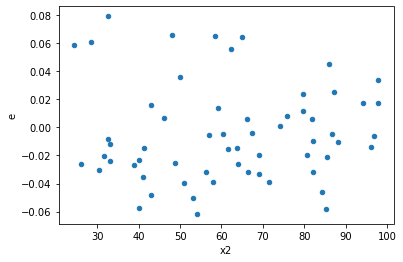

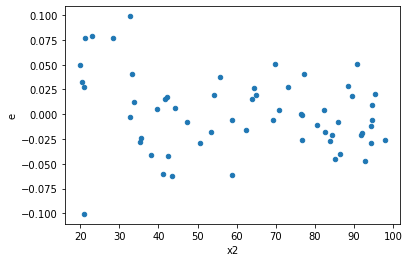

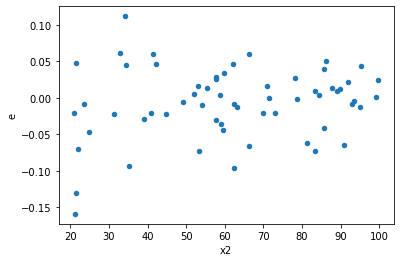

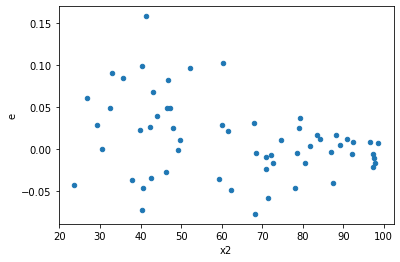

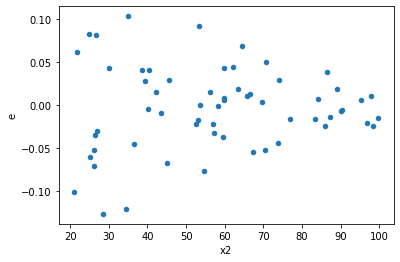

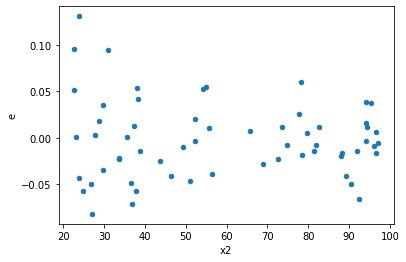

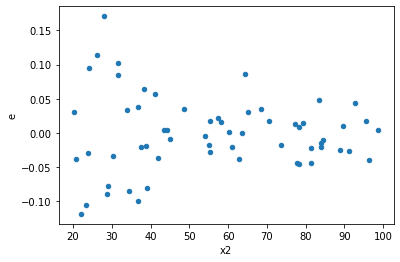

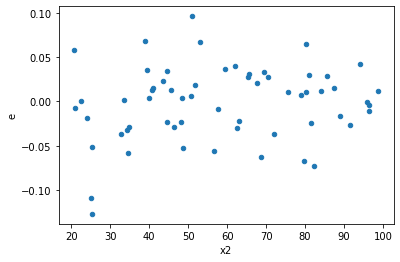

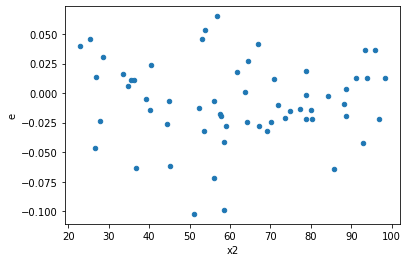

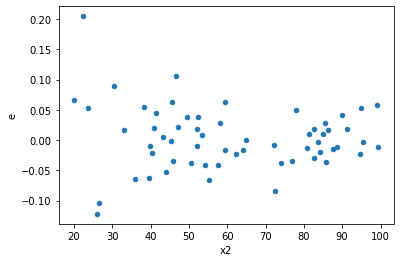

In [11]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["x1", "x2", "x3"]]
    k_means = KMeans(n_clusters=2)
    model = k_means.fit(x)
    model

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = k_means.predict(x)
    y_kmeans

    # kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    data_sort_clusters = data_clusters.sort_values('clusters')
    data_sort_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster1 = data_sort_clusters[data_sort_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSR1 = model1.ssr
    MSE1 = model1.mse_resid

    # กลุ่มที่ 2
    data_cluster0 = data_sort_clusters[data_sort_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model0 = sm.OLS(y, x).fit()

    DF0 = model0.df_resid + 1
    SSR0 = model0.ssr
    MSE0 = model0.mse_resid

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSR1/DF1) / (SSR0/DF0)

    df1 = DF1
    df0 = DF0

    # คำนวณค่า p-value
    # sf(x, dfn, dfd, loc=0, scale=1) : Survival function (also defined as 1 - cdf, but sf is sometimes more accurate)
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df0)))

    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df0)
    
    return df0, df1, SSR0, SSR1, MSE0, MSE1, GQ_test_clusters, two_tailed, p_greater

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df0=[]
list_df1=[]
list_SSR0=[]
list_SSR1=[]
list_MSE0=[]
list_MSE1=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df0, df1, SSR0, SSR1, MSE0, MSE1, GQ_test_clusters, two_tailed, p_greater=get_result(run_replicate)

    list_df0.append(df0)
    list_df1.append(df1)
    list_SSR0.append(SSR0)
    list_SSR1.append(SSR1)
    list_MSE0.append(MSE0)
    list_MSE1.append(MSE1)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df0":list_df0, "df1":list_df1, "SSR0":list_SSR0,
                     "SSR1":list_SSR1, "MSE0":list_MSE0, "MSE1":list_MSE1,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df0,df1,SSR0,SSR1,MSE0,MSE1,GQ_test_clusters,two_tailed,greater,Result_test
Replicate,,,,,,,,,,
0.0,31.0,23.0,0.01749794256641356,0.032856138150994946,0.0005832647522137854,0.001493460825045225,2.530832407780333,0.016602523404851688,0.9916987382975742,Reject001=1 : Homoscedasticity
2.0,21.0,33.0,0.03048138702273304,0.08993774053160974,0.001524069351136652,0.0028105543916128045,1.8776411837276266,0.1324461418829337,0.9337769290585332,Reject001=1 : Homoscedasticity
5.0,32.0,22.0,0.0272386633201529,0.06665888176906419,0.0008786665587146097,0.003174232465193533,3.5595863256086875,0.0011285383341113064,0.9994357308329443,Reject001=0 : Heteroscedasticity
6.0,21.0,33.0,0.0180565056737738,0.15596616948547942,0.0009028252836886901,0.004873942796421232,5.4967002229918975,0.0001314001641388174,0.9999342999179306,Reject001=0 : Heteroscedasticity
8.0,29.0,25.0,0.02700473673577541,0.028682980329096493,0.0009644548834205504,0.0011951241803790206,1.2320896703160014,0.5849002817067281,0.7075498591466359,Reject001=1 : Homoscedasticity
9.0,33.0,21.0,0.049659117438580466,0.09784503253713117,0.0015518474199556396,0.004892251626856558,3.096238669391893,0.0036030309123826765,0.9981984845438087,Reject001=0 : Heteroscedasticity
10.0,25.0,29.0,0.02670542856166523,0.09018318882934856,0.0011127261900693846,0.003220828172476734,2.9111732141517366,0.008285345245181208,0.9958573273774094,Reject001=0 : Heteroscedasticity
11.0,35.0,19.0,0.08471455227712024,0.049150773581780285,0.002491604478738831,0.002730598532321127,1.068776216949125,0.8383435474250125,0.5808282262874938,Reject001=1 : Homoscedasticity
14.0,33.0,21.0,0.05993168731199484,0.06998085106698872,0.0018728652284998387,0.0034990425533494357,1.8349209533692559,0.11510568862376713,0.9424471556881164,Reject001=1 : Homoscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df0":list_df0, "df1":list_df1, "SSR0":list_SSR0,
                     "SSR1":list_SSR1, "MSE0":list_MSE0, "MSE1":list_MSE1,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater"]].apply(lambda value: value[0] if value[0]<0.5 else 2*value[1], axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater"])
result_show.astype(str)

,df0,df1,SSR0,SSR1,MSE0,MSE1,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,31.0,23.0,0.01749794256641356,0.032856138150994946,0.0005832647522137854,0.001493460825045225,2.530832407780333,0.016602523404851688,Reject001=1 : Homoscedasticity
1.0,25.0,29.0,0.050853319219405516,0.016246728478128032,0.002118888300808563,0.0005802403027902869,0.27541565874494095,0.0011011247007663844,Reject001=0 : Heteroscedasticity
2.0,21.0,33.0,0.03048138702273304,0.08993774053160974,0.001524069351136652,0.0028105543916128045,1.8776411837276266,0.1324461418829337,Reject001=1 : Homoscedasticity
3.0,27.0,27.0,0.06766599944839558,0.03287056257238529,0.0026025384403229068,0.0012642524066302035,0.48577665061244696,0.06589841059797637,Reject001=1 : Homoscedasticity
4.0,25.0,29.0,0.0787592071268706,0.03703766475662586,0.003281633630286275,0.0013227737413080663,0.40540049229400493,0.02063319868012342,Reject001=1 : Homoscedasticity
5.0,32.0,22.0,0.0272386633201529,0.06665888176906419,0.0008786665587146097,0.003174232465193533,3.5595863256086875,0.0011285383341113064,Reject001=0 : Heteroscedasticity
6.0,21.0,33.0,0.0180565056737738,0.15596616948547942,0.0009028252836886901,0.004873942796421232,5.4967002229918975,0.0001314001641388174,Reject001=0 : Heteroscedasticity
7.0,31.0,23.0,0.07926293033236308,0.01772400772762952,0.002642097677745436,0.0008056367148922508,0.3013877973038326,0.004074859689419616,Reject001=0 : Heteroscedasticity
8.0,29.0,25.0,0.02700473673577541,0.028682980329096493,0.0009644548834205504,0.0011951241803790206,1.2320896703160014,1.4150997182932719,Reject001=1 : Homoscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      697
Reject001=0 : Heteroscedasticity    303
Name: Result_test, dtype: int64